In [1]:
import pandas as pd

In [2]:
df = pd.read_spss('soc_distrust.sav')

In [6]:
print([c for c in df.columns])

['id', 'delka', 'total', 'GENDER', 'AGE1', 'AGE2', 'EDU', 'KRAJ', 'OKRES', 'VMB', 'INCOMEP', 'EMPLOYMENT_1', 'EMPLOYMENT_2', 'EMPLOYMENT_3', 'EMPLOYMENT_4', 'EMPLOYMENT_5', 'EMPLOYMENT_6', 'EMPLOYMENT_7', 'EMPLOYMENT_8', 'EMPLOYMENT_9', 'EMPLOYMENT_10', 'Q1A_R1', 'Q1A_R2', 'Q1A_R3', 'Q1A_R4', 'Q1A_R5', 'Q1A_R6', 'Q1B_R1', 'Q1B_R2', 'Q1B_R3', 'Q1B_R4', 'Q1B_R5', 'Q1B_R6', 'Q2A_R1', 'Q2A_R2', 'Q2A_R3', 'Q2A_R4', 'Q2A_R5', 'Q2A_R6', 'Q2B_R1', 'Q2B_R2', 'Q2B_R3', 'Q2B_R4', 'Q2B_R5', 'Q2B_R6', 'Q3A_R1', 'Q3A_R2', 'Q3A_R3', 'Q3A_R4', 'Q3A_R5', 'Q3A_R6', 'Q3B_R1', 'Q3B_R2', 'Q3B_R3', 'Q3B_R4', 'Q3B_R5', 'Q3B_R6', 'Q4A_R1', 'Q4A_R2', 'Q4A_R3', 'Q4A_R4', 'Q4A_R5', 'Q4A_R6', 'Q4B_R1', 'Q4B_R2', 'Q4B_R3', 'Q4B_R4', 'Q4B_R5', 'Q4B_R6', 'Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7', 'Q5_8', 'Q5_9', 'Q5_10', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12', 'Q6_13', 'Q6_14', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q7_8', 'Q8_

In [3]:
import numpy as np

emplo = [c for c in df.columns if 'EMPLO' in c]
np.unique(df[emplo])

array(['Bez zaměstnání, hledající práci',
       'Bez zaměstnání, nehledající práci', 'Důchodce',
       'Invalidní důchodce', 'Na mateřské / rodičovské dovolené', 'Ne',
       'Podnikatel, živnostník, OSVČ', 'Student', 'V domácnosti',
       'Zaměstnanec na plný úvazek', 'Zaměstnanec na částečný úvazek'],
      dtype=object)

In [6]:
def parse_row(r):
    res = {'gender': r['GENDER'], 'age': int(r['AGE1']), 'education': r['EDU'].lower(), 'kraj': r['KRAJ'], 'okres': r['OKRES'], 'townsize': r['VMB']}
    res['employment'] = ', '.join([r[c] for c in df.columns if 'EMPL' in c and r[c] != 'Ne']).lower()
    res['income'] = '' if 'Nev' in r['INCOMEP'] else r['INCOMEP']
    res['zivotni_uroven'] = r['Q19']
    res['zajem_politika'] = r['Q20']
    res['eu'] = r['Q18']
    res['nato'] = r['Q17']
    res['covid_vacc'] = r['Q23']

    if 'Do' in res['income']:
        res['income'] = 'do 15.000 Kč'
    elif 'než' in res['income']:
        res['income'] = 'více než 80.000 Kč'
    res['income'] = res['income'] if len(res['income']) else None
    
    #res['typologie'] = r['lca_DK_n_8']
    return res

In [7]:
import numpy as np

np.random.seed(42)

n_resp = 200
sample = df.sample(n_resp)

In [9]:
dataa = [parse_row(df.loc[i]) for i in df.index]
dataa = pd.DataFrame(dataa, index=df.index)

In [18]:
dataa['income'].unique()

array(['30.001 - 40.000 Kč', '20.001 - 25.000 Kč', '25.001 - 30.000 Kč',
       '40.001 - 60.000 Kč', '15.001 - 20.000 Kč', '60.001 - 80.000 Kč',
       'do 15.000 Kč', None, 'více než 80.000 Kč'], dtype=object)

In [12]:
dataa

,gender,age,education,kraj,okres,townsize,employment,income,zivotni_uroven,zajem_politika,eu,nato,covid_vacc
0,Muž,28,vysokoškolské vzdělání,Středočeský kraj,Nymburk,Méně než 1.000,zaměstnanec na plný úvazek,30.001 - 40.000 Kč,Spíše dobrou,Velmi se zajímám,Spíše spokojený/á,Rozhodně spokojený/á,Ano
1,Muž,27,vysokoškolské vzdělání,Plzeňský kraj,Plzeň-město,Více než 100.000 obyvatel,zaměstnanec na plný úvazek,20.001 - 25.000 Kč,Spíše dobrou,Spíše se zajímám,Spíše spokojený/á,Spíše spokojený/á,Ano
2,Žena,33,základní + středoškolské vzdělání bez maturity,Královéhradecký kraj,Jičín,Méně než 1.000,zaměstnanec na plný úvazek,25.001 - 30.000 Kč,"Ani dobrou, ani špatnou",Spíše se zajímám,Spíše spokojený/á,Rozhodně spokojený/á,Ano
3,Žena,27,základní + středoškolské vzdělání bez maturity,Plzeňský kraj,Rokycany,20.001 - 100.000 obyvatel,zaměstnanec na plný úvazek,20.001 - 25.000 Kč,Spíše dobrou,Spíše se zajímám,Rozhodně spokojený/á,Rozhodně spokojený/á,Ano
4,Muž,21,středoškolské vzdělání s maturitou,Ústecký kraj,Chomutov,20.001 - 100.000 obyvatel,zaměstnanec na plný úvazek,30.001 - 40.000 Kč,Velmi dobrou,Vůbec se nezajímám,Rozhodně spokojený/á,Rozhodně spokojený/á,Ano
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,Žena,39,středoškolské vzdělání s maturitou,Plzeňský kraj,Plzeň-město,Více než 100.000 obyvatel,zaměstnanec na plný úvazek,40.001 - 60.000 Kč,Spíše dobrou,Spíše se nezajímám,Spíše spokojený/á,Spíše spokojený/á,Ne
3876,Žena,30,vysokoškolské vzdělání,Hlavní město Praha,Praha,Více než 100.000 obyvatel,zaměstnanec na částečný úvazek,None,Spíše dobrou,Spíše se zajímám,Rozhodně spokojený/á,Rozhodně spokojený/á,Ano
3877,Žena,47,vysokoškolské vzdělání,Moravskoslezský kraj,Karviná,5.001 - 20.000 obyvatel,zaměstnanec na plný úvazek,40.001 - 60.000 Kč,Spíše dobrou,Vůbec se nezajímám,Spíše spokojený/á,Rozhodně spokojený/á,Ano
3878,Žena,23,středoškolské vzdělání s maturitou,Hlavní město Praha,Praha,20.001 - 100.000 obyvatel,zaměstnanec na plný úvazek,20.001 - 25.000 Kč,Spíše špatnou,Nevím,Nevím,Nevím,Nechci uvést


In [107]:
data = [parse_row(sample.loc[i]) for i in sample.index]
data = pd.DataFrame(data)
data

,gender,age,education,kraj,okres,townsize,employment,income,zivotni_uroven,zajem_politika,eu,nato,covid_vacc,typologie
0,Žena,49,středoškolské vzdělání s maturitou,Ústecký kraj,Ústí nad Labem,5.001 - 20.000 obyvatel,v domácnosti,do 15.000 Kč,"Ani dobrou, ani špatnou",Spíše se zajímám,Nevím,Spíše nespokojený/á,Ne,Mírní příznivci konspirací zaměření na Covid
1,Žena,26,základní + středoškolské vzdělání bez maturity,Jihomoravský kraj,Vyškov,5.001 - 20.000 obyvatel,na mateřské / rodičovské dovolené,do 15.000 Kč,"Ani dobrou, ani špatnou",Vůbec se nezajímám,Spíše nespokojený/á,Spíše nespokojený/á,Ano,Nezapojení odpůrci konspirací
2,Žena,55,středoškolské vzdělání s maturitou,Olomoucký kraj,Přerov,20.001 - 100.000 obyvatel,důchodce,20.001 - 25.000 Kč,"Ani dobrou, ani špatnou",Spíše se nezajímám,Rozhodně nespokojený/á,Spíše nespokojený/á,Ano,Něco na tom je
3,Muž,46,středoškolské vzdělání s maturitou,Ústecký kraj,Chomutov,1.000 - 5.000 obyvatel,zaměstnanec na plný úvazek,30.001 - 40.000 Kč,Spíše dobrou,Spíše se zajímám,Spíše nespokojený/á,Spíše spokojený/á,Ano,Mírní odpůrci konspirací
4,Muž,28,vysokoškolské vzdělání,Jihomoravský kraj,Brno-město,Více než 100.000 obyvatel,zaměstnanec na plný úvazek,60.001 - 80.000 Kč,Velmi dobrou,Spíše se nezajímám,Spíše spokojený/á,Spíše spokojený/á,Ano,Něco na tom je
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Žena,23,vysokoškolské vzdělání,Hlavní město Praha,Praha,Více než 100.000 obyvatel,"zaměstnanec na částečný úvazek, student",25.001 - 30.000 Kč,Spíše dobrou,Vůbec se nezajímám,Nevím,Nevím,Ano,Nezapojení odpůrci konspirací
196,Žena,26,základní + středoškolské vzdělání bez maturity,Olomoucký kraj,Olomouc,1.000 - 5.000 obyvatel,zaměstnanec na plný úvazek,15.001 - 20.000 Kč,Velmi špatnou,Spíše se nezajímám,Spíše nespokojený/á,Nevím,Ne,Mírní příznivci konspirací zaměření na Covid
197,Žena,21,středoškolské vzdělání s maturitou,Jihomoravský kraj,Blansko,1.000 - 5.000 obyvatel,zaměstnanec na částečný úvazek,25.001 - 30.000 Kč,"Ani dobrou, ani špatnou",Spíše se nezajímám,Spíše spokojený/á,Spíše spokojený/á,Ano,Mírní odpůrci konspirací
198,Muž,40,středoškolské vzdělání s maturitou,Moravskoslezský kraj,Ostrava-město,Více než 100.000 obyvatel,zaměstnanec na plný úvazek,30.001 - 40.000 Kč,Spíše dobrou,Spíše se nezajímám,Spíše spokojený/á,Rozhodně spokojený/á,Ano,Mírní odpůrci konspirací


In [108]:
data['eu'].unique()

array(['Nevím', 'Spíše nespokojený/á', 'Rozhodně nespokojený/á',
       'Spíše spokojený/á', 'Rozhodně spokojený/á'], dtype=object)

In [170]:
def create_prompt(r):
    text = f"Jsem {r['gender'].lower()}, je mi {r['age']} let, mé vzdělání je {r['education']}. "
    
    kraj_name = r['kraj'].replace('raj', 'raji')
    if 'ý' in r['kraj']:
        kraj_name = kraj_name.replace('ý', 'ém')
    elif 'Praha' in kraj_name:
        kraj_name = 'Praze'

    text += f"Žiji v {kraj_name}, v okresu {r['okres']} a obci o velikosti {r['townsize']}. "

    text += f"Z hlediska zaměstnání jsem {r['employment']}"
    text += f" a příjem naší domácnosti je {r['income']}. " if r['income'] is not None else '. '

    gender_a = '' if r['gender'] == 'Muž' else 'a'

    if r['eu'] != 'Nevím':
        eu = r['eu'][:-3]
        eu += 'ý' if r['gender'] == 'Muž' else 'á'
        text += f"Jsem {eu.lower()}, že je česká republika členským státem EU. "

    if r['nato'] != 'Nevím':
        nato = r['nato'][:-3]
        nato += 'ý' if r['gender'] == 'Muž' else 'á'
        text += f"Jsem {nato.lower()}, že je česká republika členským státem NATO. "
    
    if r['zivotni_uroven'] != 'Nevím':
        zivu = r['zivotni_uroven']
        text += f"{'Mám' if 'ani' not in zivu else 'Nemám'} {zivu.lower()} životní úroveň. "

    if r['zajem_politika'] != 'Nevím':
        text += f"{r['zajem_politika']} o politiku. "

    if r['covid_vacc'] == 'Ano':
        text += f"Jsem očkován{gender_a} proti covidu. "
    elif r['covid_vacc'] == 'Ne':
        text += f"Nejsem očkován{gender_a} proti covidu. "
    
    #text += f"Z hlediska postoje ke konspiracím bych nejlépe byl{gender_a} zařazen{gender_a} mezi skupinu \"{r['typologie']}\"."
    
    return text

In [171]:
prompt_start = """
In place of [INSERT], fill in (in Czech) whether the respondent voted in \"Volby do poslanecké sněmovny 2021\" and if yes, then for what party.
List the probable parties with probabilities (always output whether the respondent voted and for what party). List as many parties as necessary.
You can also answer "jiná strana" if the voter voted for a small unpopular party. The probabilities must sum up to 1.0.

The output format is:
*[volil, proba a], [nevolil, proba b]; [PARTY1, proba 1], [PARTY2, proba 2],... , [PARTYN, proba n]]*
 where PARTY1, PARTY2,... are the names of the parties, proba a, proba b, proba 1,... should be replaced by float probabilities. Do not print anything else after the second star sign.
 Always list both [volil, proba a], [nevolil, proba b] with the respective probabilities. The probabilities should sum up to 1. (i.e. proba of volil + nevolil = 1.0,
 proba 1 + proba 2 + ... + proba n = 1.0) 
 Be sure to keep the correct separators (';' between the volil/nevolil section and party section, ',' anywhere else).

"""
prompt_end = " Ve volbách do poslanecké sněmovny 2021 jsem [INSERT]"

In [172]:
act_prompt_start = """
You will get a question about who you voted in some elections. List whether you voted or not, and what party you voted for if yes. The output format is:
*[volil, proba a], [nevolil, proba b]; [PARTY1, proba 1], [PARTY2, proba 2],... , [PARTYN, proba n]]*
where PARTY1, PARTY2,... are the names of the parties, proba a, proba b, proba 1,... should be replaced by float probabilities. Do not print anything else after the second star sign.
Always list both [volil, proba a], [nevolil, proba b] with the respective probabilities. The probabilities should sum up to 1. (i.e. proba of volil + nevolil = 1.0,
proba 1 + proba 2 + ... + proba n = 1.0) 
Be sure to keep the correct separators (';' between the volil/nevolil section and party section, ',' anywhere else).

Act like a Czech respondent of the following group:
"""

act_prompt_end = """
Koho jsi volil ve volbách do poslanecké sněmovny 2021?
"""

In [173]:
czech_prompt_start = """Po značce [INSERT] doplň, zda respondent volil ve volbách do poslanecké sněmovny 2021 a pokud ano, pro jakou stranu hlasoval.
Možné strany, kterým nejspíše dal hlas, vypiš s pravděpodobností že pro danou stranu hlasoval. Vypiš kolik stran je potřeba.
Případně můžeš vypsat i "jiná strana", což představuje hlas pro málo populární stranu. Součet pravděpodobností musí být 1.0.

Formát výstupu je:
*[volil, proba a], [nevolil, proba b]; [PARTY1, proba 1], [PARTY2, proba 2],... , [PARTYN, proba n]*
 kde PARTY1, PARTY2,... jsou jména stram, proba a, proba b, proba 1,... je třeba nahradit desetinnými čísly (pravděpodobnost). Za druhý znak "*" už nic nevypisuj.
  
 Zachovej správné oddělovače (';' mezi sekcí volil/nevolil a sekcí stran, všude jinde ','). Volil/nevolil je první, pak následují strany.
"""

czech_prompt_end = " Ve volbách do poslanecké sněmovny 2021 jsem [INSERT]"

In [176]:
ex_prompt = prompt_start + create_prompt(data.iloc[0]) + prompt_end
#ex_prompt = czech_prompt_start + create_prompt(data.iloc[0]) + czech_prompt_end
print(ex_prompt)

Po značce [INSERT] doplň, zda respondent volil ve volbách do poslanecké sněmovny 2021 a pokud ano, pro jakou stranu hlasoval.
Možné strany, kterým nejspíše dal hlas, vypiš s pravděpodobností že pro danou stranu hlasoval. Vypiš kolik stran je potřeba.
Případně můžeš vypsat i "jiná strana", což představuje hlas pro málo populární stranu. Součet pravděpodobností musí být 1.0.

Formát výstupu je:
*[volil, proba a], [nevolil, proba b]; [PARTY1, proba 1], [PARTY2, proba 2],... , [PARTYN, proba n]*
 kde PARTY1, PARTY2,... jsou jména stram, proba a, proba b, proba 1,... je třeba nahradit desetinnými čísly (pravděpodobnost). Za druhý znak "*" už nic nevypisuj.
  
 Zachovej správné oddělovače (';' mezi sekcí volil/nevolil a sekcí stran, všude jinde ','). Volil/nevolil je první, pak následují strany.
Jsem žena, je mi 49 let, mé vzdělání je středoškolské vzdělání s maturitou. Žiji v Ústeckém kraji, v okresu Ústí nad Labem a obci o velikosti 5.001 - 20.000 obyvatel. Z hlediska zaměstnání jsem v dom

In [182]:
import cohere

model = "command-r-plus"

co = cohere.Client('YOUR_API_KEY')

In [180]:
response = co.chat(
  message=ex_prompt,
  model=model
)
print(response)

text='*volil, 0.8,], [nevolil, 0.2]; [ANO, 0.35], [SPD, 0.25], [KSČM, 0.15], [jiná strana, 0.25]*' generation_id='8ac4d594-58ab-4fcf-a6ac-7d515fa52d0e' citations=None documents=None is_search_required=None search_queries=None search_results=None finish_reason='COMPLETE' tool_calls=None chat_history=[ChatMessage(role='USER', message='Po značce [INSERT] doplň, zda respondent volil ve volbách do poslanecké sněmovny 2021 a pokud ano, pro jakou stranu hlasoval.\nMožné strany, kterým nejspíše dal hlas, vypiš s pravděpodobností že pro danou stranu hlasoval. Vypiš kolik stran je potřeba.\nPřípadně můžeš vypsat i "jiná strana", což představuje hlas pro málo populární stranu. Součet pravděpodobností musí být 1.0.\n\nFormát výstupu je:\n*[volil, proba a], [nevolil, proba b]; [PARTY1, proba 1], [PARTY2, proba 2],... , [PARTYN, proba n]*\n kde PARTY1, PARTY2,... jsou jména stram, proba a, proba b, proba 1,... je třeba nahradit desetinnými čísly (pravděpodobnost). Za druhý znak "*" už nic nevypisuj.

In [188]:
from tqdm import tqdm

PS, PE = prompt_start, prompt_end

if 'results' in vars():
    print('results exists')
else:
    results = {}

pbar = tqdm(dataa.index)
for i in pbar:
    if i in results:
        continue

    row = dataa.loc[i]
    pr = PS + create_prompt(row) + PE
    
    response = co.chat(message=pr, temperature=0.3)
    results[i] = response
    pbar.set_postfix({'text': response.text})

  0%|                                                                                          | 0/3880 [00:00<?, ?it/s]

results exists


100%|█| 3880/3880 [1:21:20<00:00,  1.26s/it, text=* [volil, 0.6], [nevolil, 0.4]; [ANO, 0.25], [SPOLU, 0.15], [Piráti a 


In [7]:
import pickle

#optionally load
#with open('output_2024-05-07_nato_vacc_good.pickle', 'rb') as f:
#with open('full_coral-2024-25-06_nato.pickle', 'rb') as f:
#    results = pickle.load(f)

In [8]:
#results, index = results['data'], results['index']

In [9]:
def parse_resp(r):
    r = r.replace('volil, 0.65 a]', '[volil, 0.65]').replace('volil, 0.55 a]', '[volil, 0.55]').strip('*').strip(';').replace(']]', ']').strip()
    r = r.replace(' a]', ']').replace(' b]', ']')
    voted, parties = r.split(']; [')

    volil, nevolil = voted.split('], [')
    volil = volil.strip('[')
    nevolil = nevolil.strip(']')
    res_volil = {}
    
    def get_pb_name(v):
        name, pb = v.split(', ')
        pb = float(pb)
        res_volil[name] = pb

    get_pb_name(volil)
    get_pb_name(nevolil)
    assert len(res_volil) == 2
    
    ps, pbs = [], []
    for val in parties.split('], ['):
        val = val.replace('proba ', '')
        val = val.replace('[', '').replace(']', '')
        p, pb = val.split(', ')
        ps.append(p)
        pbs.append(float(pb))

    return res_volil, ps, pbs

In [10]:
def parse_party(o):
    if 'ANO' in o:
        return 'ANO'
    if 'Komu' in o:
        return 'KSČM'
    if 'Spolu' in o:
        return 'SPOLU'
    if 'STAR' in o:
        return 'PirátiSTAN'
    if 'SPD' in o:
        return 'SPD'
    if 'Robert' in o:
        return 'PŘÍSAHA'
    if 'SSD' in o or 'Tri' in o or 'iná' in o:
        return 'jiná strana'
    if 'Nebyl' in o:
        return 'nevolil'
    if 'Nechci' in o or 'Nevím' in o:
        return 'nevolil'
    raise ValueError()

In [29]:
import numpy as np
from tqdm import tqdm

parsed = []
origs = []

n_samples = 10
res_dfs = [{} for _ in range(n_samples)]
res_correct = [0 for _ in range(n_samples)]
res_correct_voters = [0 for _ in range(n_samples)]

voters = 0

#for i in tqdm(ress.keys()):
for idx, i in tqdm(enumerate(dataa.index)):
    i = int(i)
   
    orig = df.loc[i]['Q21']
    pred = results[i].text
    
    failures = ['[nevolil, 1.0];',
                '[nevolila, 1.0]; [], []',
                '[volil, 0.0], [nevolil, 1.0];',
                '[nevolila, 1.0], ;',
               '[nevolil, 1.0]; [], []',
               '[nevolil, 1.0], []; []']
    if pred.strip('*') in failures:
        volil = False
    else:
        res_volil, parts, pbs = parse_resp(pred)
        #print(res_volil, parts, pbs)
        volil = np.random.choice([True, False], size=1, p=[res_volil['volil'], res_volil['nevolil']])

    #if 'SPD' in parts:
    #    print(volil, parts, pbs)

    for i in range(n_samples):
        if volil:        
            pbs = np.array(pbs)
            pbs /= sum(pbs)
            choice = np.random.choice(parts, size=1, p=pbs)[0]
            if 'Piráti' in choice or 'Pirati' in choice or 'STAN' in choice or 'PIR' in choice or 'Pirá' in choice:
                choice = 'PirátiSTAN'
            elif 'ODS' in choice or 'TOP' in choice or 'KDU' in choice or 'SPOLU' in choice.upper() or 'Koalice 3' in choice:
                choice = 'SPOLU'
            elif choice == 'NEVÍM' or 'vobodn' in choice or choice == 'TSS':
                continue
            elif 'PŘÍS' in choice.upper():
                choice = 'PŘÍSAHA'
            elif choice == 'NEVOLIL':
                choice = 'nevolil'
            elif 'SSD' in choice or 'statní' in choice or 'Trikolora' in choice or 'JIN' in choice.upper() or 'DSSS' in choice or 'TSS' in choice:
                choice = 'jiná strana'
            elif 'elení' in choice or 'ELENÍ' in choice:
                choice = 'jiná strana'
            elif 'ANO' in choice:
                choice = 'ANO'
            elif 'KSČM' in choice:
                choice = 'KSČM'
        else:
            choice = 'nevolil'
        
        orig_parsed = parse_party(orig)
        
        parsed.append(choice)
        origs.append(orig_parsed)

        if orig_parsed != 'nevolil':
            voters += 1
            if choice == orig_parsed:
                res_correct_voters[i] += 1
        
        if choice == orig_parsed:
            res_correct[i] += 1

        def save_to_res(res_df, key, val):
            if val not in res_df:
                res_df[val] = {}
            if key not in res_df[val]:
                res_df[val][key] = 0
            res_df[val][key] += 1

        save_to_res(res_dfs[i], 'predicted', choice)
        save_to_res(res_dfs[i], 'voted', orig_parsed)

voters /= n_samples

3880it [00:09, 414.06it/s]


In [33]:
np.mean([r / len(dataa) for r in res_correct])

0.2475

In [32]:
np.mean([r / voters for r in res_correct_voters])

0.13868369433663036

In [14]:
np.unique(parsed)

array(['ANO', 'KSČM', 'PirátiSTAN', 'PŘÍSAHA', 'SPD', 'SPOLU',
       'jiná strana', 'nevolil'], dtype='<U11')

In [15]:
plot_df = []

for i, d in enumerate(res_dfs):
    for k, v in d.items():
        if 'predicted' in v:
            plot_df.append({'party': k, 'count': v['predicted'], 'output': 'predicted'})
        if i == 0 and 'voted' in v:
            plot_df.append({'party': k, 'count': v['voted'], 'output': 'voted'})

plot_df = pd.DataFrame(plot_df)
plot_df['count'] /= len(results)
plot_df

,party,count,output
0,nevolil,0.415722,predicted
1,nevolil,0.381443,voted
2,PirátiSTAN,0.118299,predicted
3,PirátiSTAN,0.128351,voted
4,ANO,0.194330,predicted
...,...,...,...
83,ANO,0.181443,predicted
84,jiná strana,0.069330,predicted
85,SPD,0.034021,predicted
86,KSČM,0.016237,predicted


In [16]:
plot_df['party'].unique()

array(['nevolil', 'PirátiSTAN', 'ANO', 'jiná strana', 'SPOLU', 'SPD',
       'KSČM', 'PŘÍSAHA'], dtype=object)

In [17]:
plot_df['party'] = pd.Categorical(plot_df['party'], ['ANO', 'SPOLU', 'PirátiSTAN', 'SPD', 'KSČM', 'PŘÍSAHA', 'jiná strana', 'nevolil'])

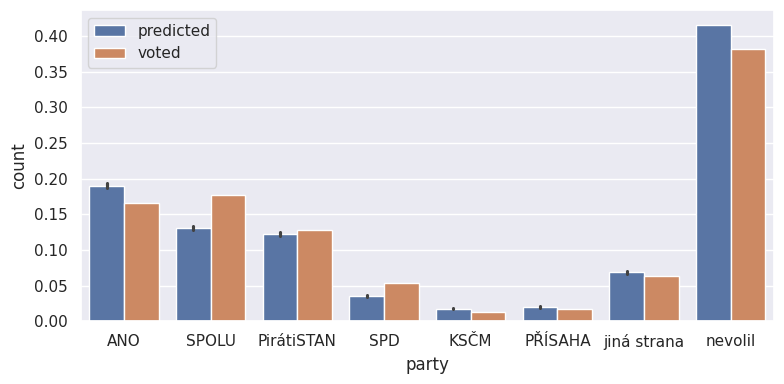

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(8,4))
sns.barplot(data=plot_df, x='party', y='count', hue='output'), #stat='probability', label='Výstup coralu')
#sns.barplot(data=plot_df, x='party', y='voted', alpha=0.8)#origs, stat='probability', alpha=0.8, shrink=0.5, label='Volba respondenta')
plt.legend()
plt.tight_layout()
plt.yticks(np.arange(0, 0.45, 0.05))
plt.savefig('img/all_spolnedu.pdf')
plt.show()

In [23]:
np.unique(parsed)

array(['ANO', 'PirátiSTAN', 'PŘÍSAHA', 'SPD', 'SPOLU', 'jiná strana',
       'nevolil'], dtype='<U11')

In [24]:
np.unique([o for o in origs if o is not None])

array(['ANO', 'KSČM', 'PirátiSTAN', 'PŘÍSAHA', 'SPD', 'SPOLU',
       'jiná strana', 'nevolil'], dtype='<U11')